In [259]:
import numpy as np
import pandas as pd

df = pd.read_csv('AmesHousing.csv')
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [260]:
print("Column Names:", df.columns.tolist())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:", missing_values[missing_values > 0])

# Check data types
print(df.dtypes)

Column Names: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive

In [261]:
df['Neighborhood']
print(df["Year Remod/Add"].value_counts())


Year Remod/Add
1950    361
2006    202
2007    164
2005    141
2004    111
       ... 
1986     13
1981     13
2010     13
1983     11
1982      9
Name: count, Length: 61, dtype: int64


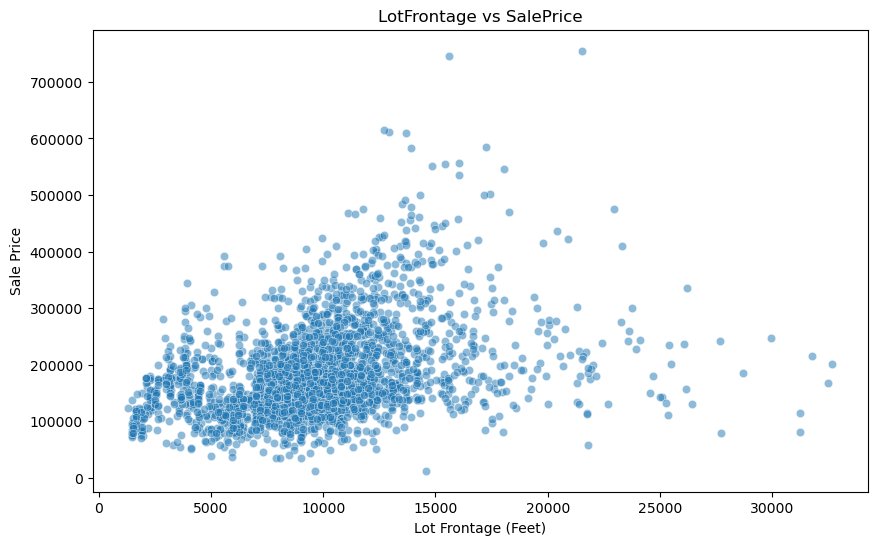

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df[df["Lot Area"] < df["Lot Area"].quantile(0.99)]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Lot Area", y="SalePrice", alpha=0.5)
plt.title("LotFrontage vs SalePrice")
plt.xlabel("Lot Frontage (Feet)")
plt.ylabel("Sale Price")
plt.show()


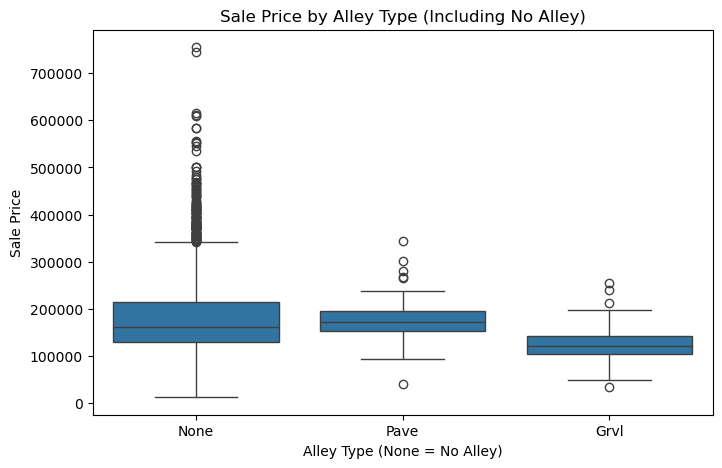

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace NaN values with "None" to indicate houses without alleys
df["Alley"] = df["Alley"].fillna("None")

# Plot boxplot to compare sale prices of houses with and without alleys
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Alley", y="SalePrice")
plt.title("Sale Price by Alley Type (Including No Alley)")
plt.xlabel("Alley Type (None = No Alley)")
plt.ylabel("Sale Price")
plt.show()


In [264]:
import scipy.stats as stats

# Create subsets for each Alley type
group_none = df[df["Alley"] == "None"]["SalePrice"]
group_pave = df[df["Alley"] == "Pave"]["SalePrice"]
group_grvl = df[df["Alley"] == "Grvl"]["SalePrice"]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(group_none, group_pave, group_grvl)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.6f}")


ANOVA F-statistic: 32.981, p-value: 0.000000


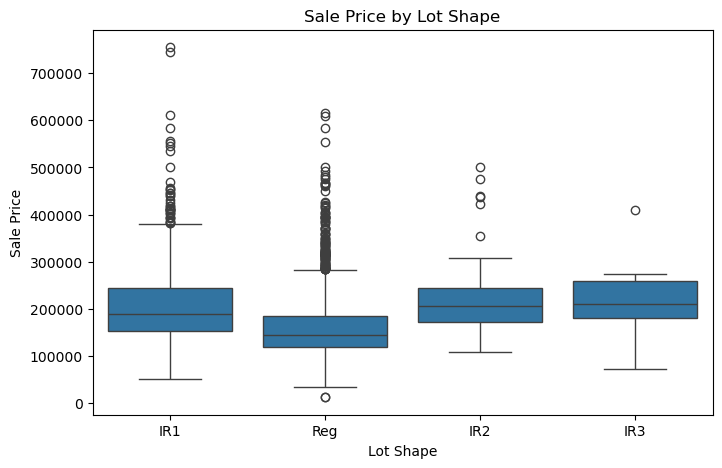

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Lot Shape", y="SalePrice")
plt.title("Sale Price by Lot Shape")
plt.xlabel("Lot Shape")
plt.ylabel("Sale Price")
plt.show()


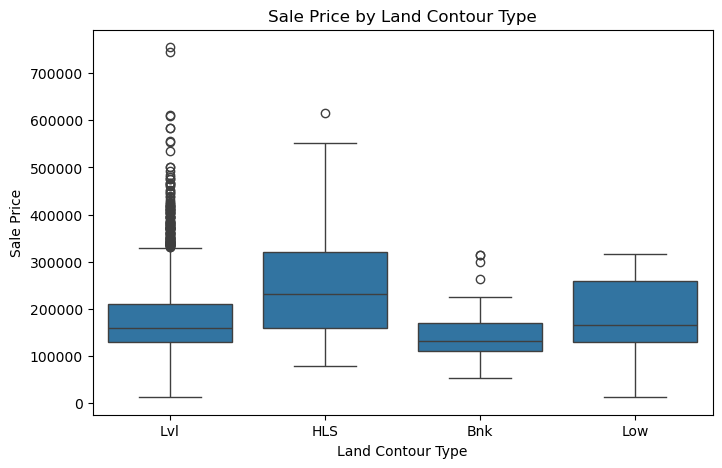

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Land Contour", y="SalePrice")
plt.title("Sale Price by Land Contour Type")
plt.xlabel("Land Contour Type")
plt.ylabel("Sale Price")
plt.show()


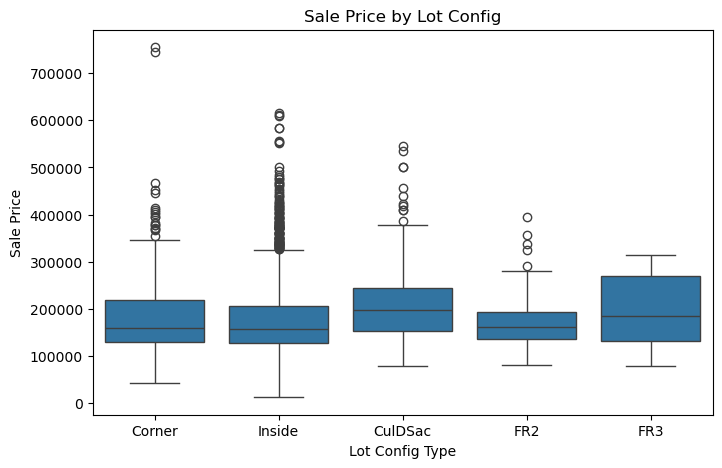

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Lot Config", y="SalePrice")
plt.title("Sale Price by Lot Config")
plt.xlabel("Lot Config Type")
plt.ylabel("Sale Price")
plt.show()


In [268]:
correlation = df["Overall Qual"].corr(df["SalePrice"])
print(f"Correlation between OverallQual and SalePrice: {correlation:.3f}")


Correlation between OverallQual and SalePrice: 0.808


In [269]:
correlation = df["Overall Cond"].corr(df["SalePrice"])
print(f"Correlation between OverallCond and SalePrice: {correlation:.3f}")


Correlation between OverallCond and SalePrice: -0.105


In [270]:
df["Cond_Qual_Interaction"] = df["Overall Cond"] * df["Overall Qual"]
interaction_corr = df["Cond_Qual_Interaction"].corr(df["SalePrice"])
print(f"Correlation between (OverallCond * OverallQual) and SalePrice: {interaction_corr:.3f}")


Correlation between (OverallCond * OverallQual) and SalePrice: 0.564


In [271]:
import statsmodels.api as sm

X = df[["Overall Qual"]]  # Only using OverallQual
X = sm.add_constant(X)  # Add intercept
y = df["SalePrice"]

model_qual = sm.OLS(y, X).fit()
print(model_qual.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     5433.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:37:30   Log-Likelihood:                -35278.
No. Observations:                2900   AIC:                         7.056e+04
Df Residuals:                    2898   BIC:                         7.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.584e+04   3839.790    -24.960   

In [272]:
X = df[["Overall Qual", "Cond_Qual_Interaction"]]
X = sm.add_constant(X)  # Add intercept

model_interaction = sm.OLS(y, X).fit()
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2728.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:37:31   Log-Likelihood:                -35274.
No. Observations:                2900   AIC:                         7.055e+04
Df Residuals:                    2897   BIC:                         7.057e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -9.383e+

In [273]:
df["OverallQual_Squared"] = df["Overall Qual"] ** 4
qual_squared_corr = df["OverallQual_Squared"].corr(df["SalePrice"])
print(f"Correlation between OverallQual² and SalePrice: {qual_squared_corr:.3f}")



Correlation between OverallQual² and SalePrice: 0.845


In [274]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Define features for VIF test
X = df[["Overall Qual", "OverallQual_Squared"]]
X = sm.add_constant(X)  # Add intercept

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


               Feature        VIF
0                const  73.881381
1         Overall Qual   6.442188
2  OverallQual_Squared   6.442188


In [275]:
X = df[["OverallQual_Squared", "Overall Qual"]]
X = sm.add_constant(X)  # Add intercept
y = df["SalePrice"]

model_qual = sm.OLS(y, X).fit()
print(model_qual.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     3724.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:37:32   Log-Likelihood:                -34963.
No. Observations:                2900   AIC:                         6.993e+04
Df Residuals:                    2897   BIC:                         6.995e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.499e+04   6

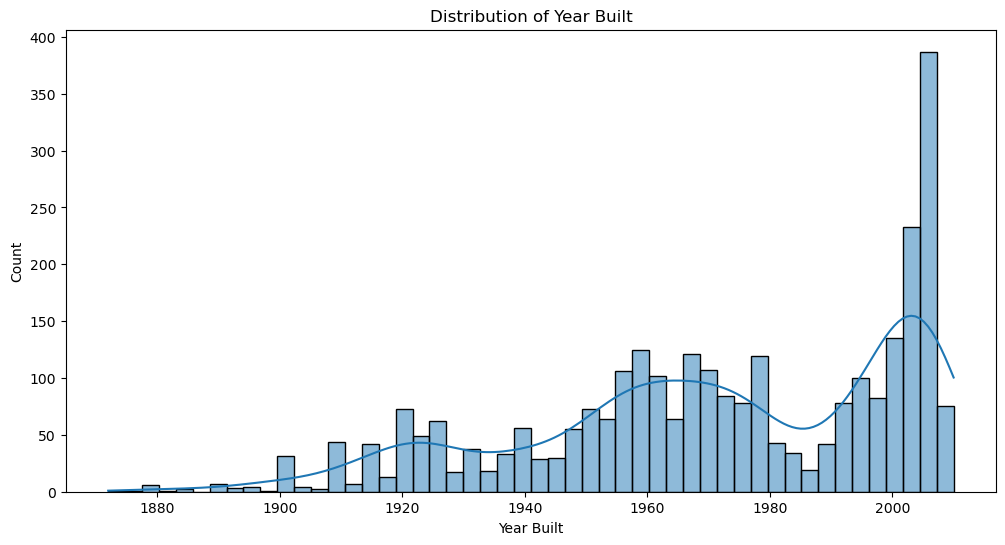

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(df["Year Built"], bins=50, kde=True)
plt.title("Distribution of Year Built")
plt.xlabel("Year Built")
plt.ylabel("Count")
plt.show()


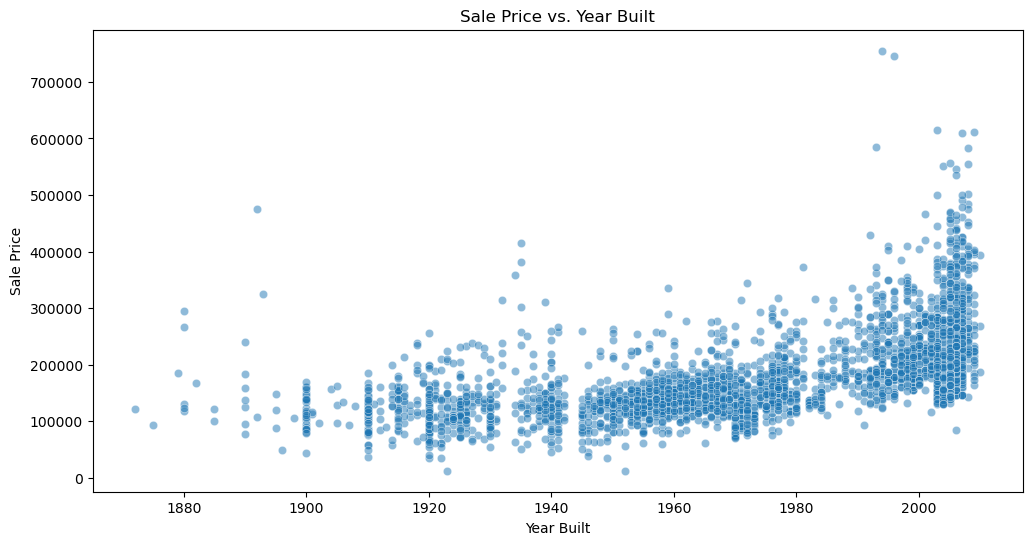

In [277]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="Year Built", y="SalePrice", alpha=0.5)
plt.title("Sale Price vs. Year Built")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.show()


In [278]:
yearbuilt_corr = df["Year Built"].corr(df["SalePrice"])
print(f"Correlation between YearBuilt and SalePrice: {yearbuilt_corr:.3f}")


Correlation between YearBuilt and SalePrice: 0.566


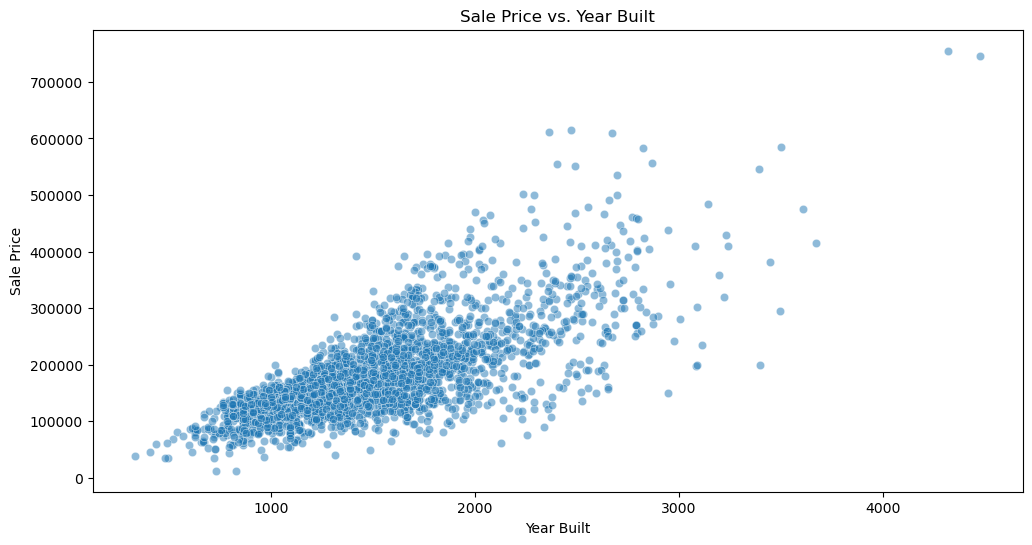

In [279]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="Gr Liv Area", y="SalePrice", alpha=0.5)
plt.title("Sale Price vs. Year Built")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.show()


In [280]:
yearbuilt_corr = df["Gr Liv Area"].corr(df["SalePrice"])
print(f"Correlation between YearBuilt and SalePrice: {yearbuilt_corr:.3f}")


Correlation between YearBuilt and SalePrice: 0.726


In [281]:
df["Condition 2"]

0       Norm
1       Norm
2       Norm
3       Norm
4       Norm
        ... 
2925    Norm
2926    Norm
2927    Norm
2928    Norm
2929    Norm
Name: Condition 2, Length: 2900, dtype: object

In [282]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

df["HouseAge"] = 2024 - df["Year Built"]  # Replace 2024 with the dataset's last sale year

scaler = StandardScaler()
features_to_scale = ["Lot Area", "Gr Liv Area", "Year Remod/Add", "OverallQual_Squared", "HouseAge", "Cond_Qual_Interaction"]

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

X = df[["Lot Area", "Gr Liv Area", "Year Remod/Add", 
        "OverallQual_Squared", "HouseAge", "Condition 1", "Condition 2", "Cond_Qual_Interaction"]]

# One-hot encode 'Condition1' and 'Condition2' columns
X = pd.get_dummies(X, columns=["Condition 1", "Condition 2"], drop_first=True)

# Ensure all data is numeric by converting to float
X = X.astype(float)
y = y.astype(float)

print(X.head())
y = df["SalePrice"]


   Lot Area  Gr Liv Area  Year Remod/Add  OverallQual_Squared  HouseAge  \
0  5.567726     0.337705       -1.164933            -0.321277  0.375951   
1  0.504640    -1.220666       -1.116969            -0.718899  0.342928   
2  1.169315    -0.332805       -1.260859            -0.321277  0.441997   
3  0.388542     1.268627       -0.781225             0.333525  0.111766   
4  1.059499     0.282342        0.657678            -0.718899 -0.845903   

   Cond_Qual_Interaction  Condition 1_Feedr  Condition 1_Norm  \
0              -0.409589                0.0               1.0   
1              -0.409589                1.0               0.0   
2               0.246296                0.0               1.0   
3               0.136982                0.0               1.0   
4              -0.956160                0.0               1.0   

   Condition 1_PosA  Condition 1_PosN  ...  Condition 1_RRAn  \
0               0.0               0.0  ...               0.0   
1               0.0           

In [283]:
# Reset the index of X and y to ensure they are aligned
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Fit the reduced model (just the intercept)
X_reduced = sm.add_constant(pd.DataFrame({'constant': [1]*len(y)}))  # Only intercept
reduced_model = sm.OLS(y, X_reduced).fit()

# Fit the full model (with the selected features)
full_model = sm.OLS(y, X).fit()

# Output results
print(full_model.summary())
print(reduced_model.summary())


                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              5619.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):                        0.00
Time:                        20:37:36   Log-Likelihood:                         -34041.
No. Observations:                2900   AIC:                                  6.812e+04
Df Residuals:                    2879   BIC:                                  6.825e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [284]:
# Get the RSS for the full model and reduced model
RSS_full = sum((full_model.resid) ** 2)  # Residual sum of squares for the full model
RSS_reduced = sum((reduced_model.resid) ** 2)  # Residual sum of squares for the reduced model

# Number of observations and number of features (excluding intercept)
n = len(y)  # Number of observations
p_full = full_model.df_model  # Number of features in the full model
p_reduced = reduced_model.df_model  # Number of features in the reduced model

# Calculate the F-statistic
F_statistic = ((RSS_reduced - RSS_full) / (p_full - p_reduced)) / (RSS_full / (n - p_full - 1))

# Calculate the p-value for the F-statistic
from scipy.stats import f
p_value = 1 - f.cdf(F_statistic, p_full - p_reduced, n - p_full - 1)

# Output the F-statistic and p-value
print(f"F-statistic: {F_statistic:.3f}")
print(f"P-value: {p_value:.3f}")


F-statistic: 787.643
P-value: 0.000


In [285]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIF calculation
X_vif = X.copy()
X_vif = sm.add_constant(X_vif)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


                  Feature         VIF
0                   const  611.690316
1                Lot Area    1.204904
2             Gr Liv Area    1.709661
3          Year Remod/Add    2.023409
4     OverallQual_Squared    2.920130
5                HouseAge    2.194631
6   Cond_Qual_Interaction    1.990368
7       Condition 1_Feedr    2.710086
8        Condition 1_Norm    4.217917
9        Condition 1_PosA    1.345340
10       Condition 1_PosN    1.511008
11       Condition 1_RRAe    1.343645
12       Condition 1_RRAn    1.662807
13       Condition 1_RRNe    1.068572
14       Condition 1_RRNn    1.131719
15      Condition 2_Feedr    3.477499
16       Condition 2_Norm    5.769470
17       Condition 2_PosA    2.009012
18       Condition 2_PosN    1.728165
19       Condition 2_RRAe    1.216283
20       Condition 2_RRAn    1.211974
21       Condition 2_RRNn    1.424057


In [286]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 2030
Test set size: 870


In [287]:
# Fit the model on the training data
model = sm.OLS(y_train, X_train).fit()

# Print the model summary for training data
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              4423.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):                        0.00
Time:                        20:37:41   Log-Likelihood:                         -23742.
No. Observations:                2030   AIC:                                  4.752e+04
Df Residuals:                    2010   BIC:                                  4.764e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

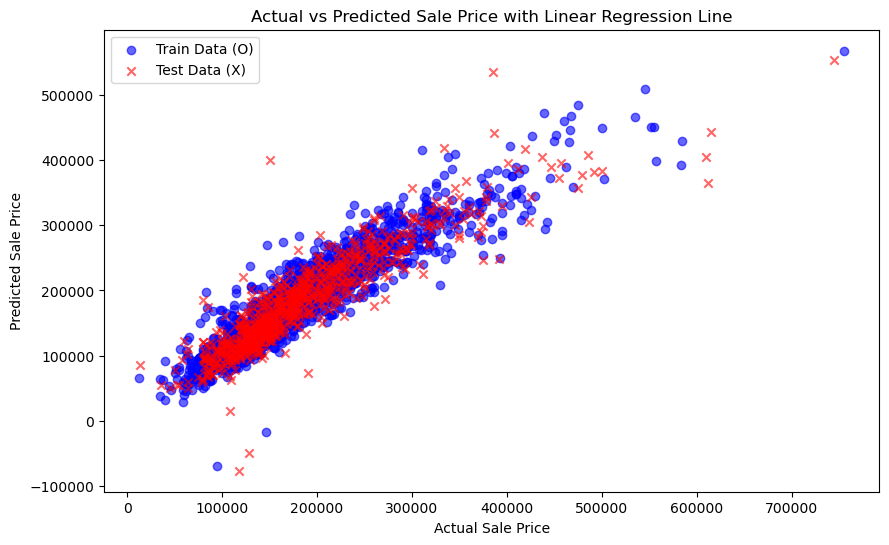

In [288]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plotting the training data predictions (blue 'O' markers)
plt.scatter(y_train, y_train_pred, color='blue', label='Train Data (O)', alpha=0.6, marker='o')

# Plotting the test data predictions (red 'X' markers)
plt.scatter(y_test, y_test_pred, color='red', label='Test Data (X)', alpha=0.6, marker='x')

# Labels and Title
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price with Linear Regression Line")

# Add a legend to distinguish between train, test, and the regression line
plt.legend()

# Show plot
plt.show()


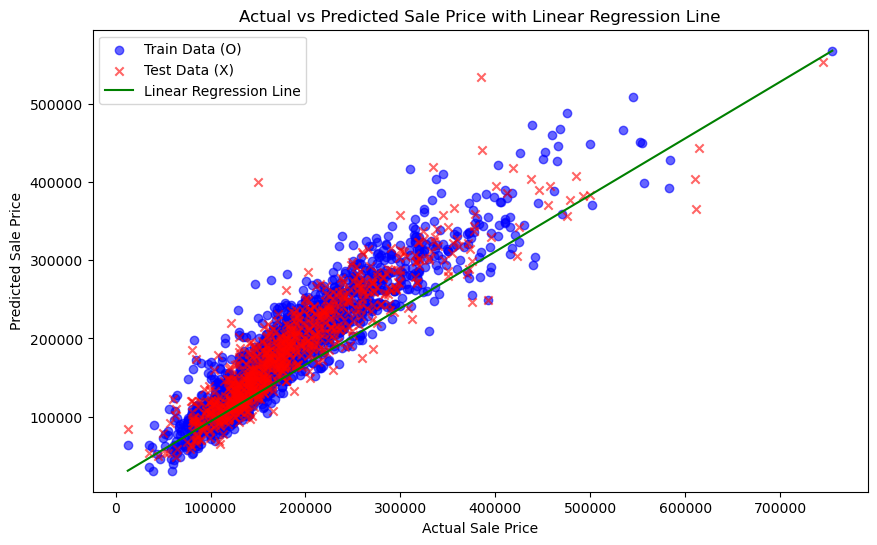

R² on Test Data: 0.838
RMSE on Test Data: 32696.103


In [289]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Ensure that the 'HouseAge' column is created
df["HouseAge"] = 2024 - df["Year Built"]

# Features to scale
features_to_scale = ["Lot Area", "Gr Liv Area", "Year Remod/Add", "OverallQual_Squared", "HouseAge", "Cond_Qual_Interaction"]

# Scale the selected features
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Prepare the feature matrix X and target vector y
X = df[["Lot Area", "Gr Liv Area", "Year Remod/Add", "OverallQual_Squared", "HouseAge", "Condition 1", "Condition 2", "Cond_Qual_Interaction"]]

# One-hot encode 'Condition1' and 'Condition2' columns
X = pd.get_dummies(X, columns=["Condition 1", "Condition 2"], drop_first=True)

# Ensure the target variable y is numeric
y = df["SalePrice"]

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model using scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plotting the predictions
plt.figure(figsize=(10, 6))

# Plot the training data predictions (blue 'O' markers)
plt.scatter(y_train, y_train_pred, color='blue', label='Train Data (O)', alpha=0.6, marker='o')

# Plot the test data predictions (red 'X' markers)
plt.scatter(y_test, y_test_pred, color='red', label='Test Data (X)', alpha=0.6, marker='x')

# Plot the linear regression line (fit a line for the plot)
plt.plot([min(y), max(y)], [min(y_train_pred), max(y_train_pred)], color='green', label='Linear Regression Line')

# Labels and Title
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price with Linear Regression Line")

# Add a legend to distinguish between train, test, and the regression line
plt.legend()

# Show plot
plt.show()

# Evaluate model performance using R² and RMSE
mse = mean_squared_error(y_test, y_test_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_test_pred)

print(f"R² on Test Data: {r2:.3f}")
print(f"RMSE on Test Data: {rmse:.3f}")


In [290]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_dt = dt_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt) ** 0.5

print(f"Decision Tree R²: {r2_dt:.3f}")
print(f"Decision Tree RMSE: {rmse_dt:.3f}")


Decision Tree R²: 0.747
Decision Tree RMSE: 40861.606


In [291]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have already defined X and y

# Standardize the data (important for gradient-based methods)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the SGDRegressor model
sgd_model = SGDRegressor(max_iter=10000, tol=1e-3, learning_rate='invscaling',penalty='l2', eta0=0.001, random_state=42)

# Fit the model
sgd_model.fit(X_train, y_train)

# Make predictions
y_train_pred = sgd_model.predict(X_train)
y_test_pred = sgd_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import root_mean_squared_error, r2_score

# R² on test data
r2 = r2_score(y_test, y_test_pred)
# RMSE
rmse = root_mean_squared_error(y_test, y_test_pred)

print(f"R² on Test Data: {r2:.3f}")
print(f"RMSE on Test Data: {rmse:.3f}")


R² on Test Data: 0.835
RMSE on Test Data: 32997.149


In [296]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

percentile_99 = np.percentile(df['SalePrice'], 99)
df_filtered = df[df['SalePrice'] < percentile_99]

print(f"Filtered dataset size: {df_filtered.shape[0]}")

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Check the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Log-transform the target variable (SalePrice)
y_train_log = np.log1p(y_train)  # log(1 + y) to handle values like 0
y_test_log = np.log1p(y_test)

# Check the transformation
print(f"Log-transformed y_train head:\n{y_train_log.head()}")



Training set size: 2030
Test set size: 870
Log-transformed y_train head:
657     11.643962
2013    11.744045
2004    11.608245
1192    11.856522
824     12.515398
Name: SalePrice, dtype: float64


In [309]:
# Fit the model on the training data
X_train = X_train.astype(float)
X_test = X_test.astype(float)

model = sm.OLS(y_train_log, X_train).fit()

# Print the model summary for training data
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          8.963e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):                        0.00
Time:                        20:45:56   Log-Likelihood:                         -1031.6
No. Observations:                2030   AIC:                                      2103.
Df Residuals:                    2010   BIC:                                      2215.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

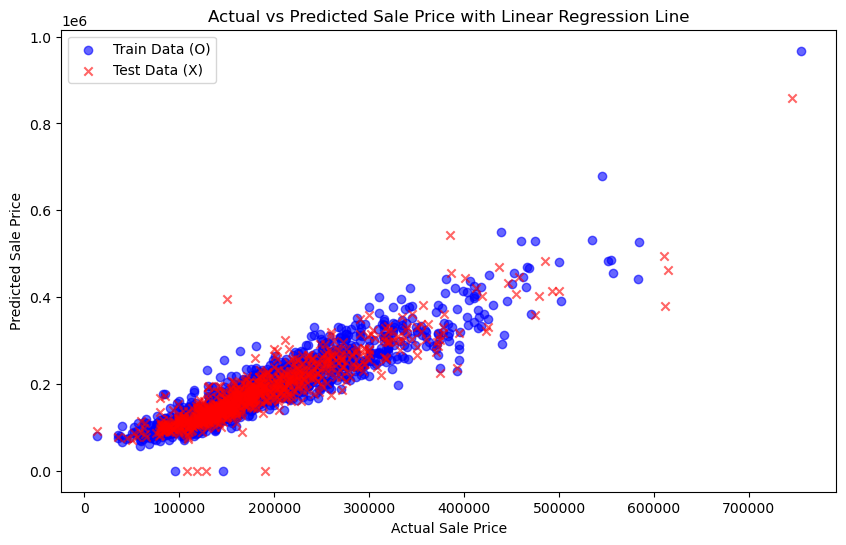

In [319]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plotting the training data predictions (blue 'O' markers)
plt.scatter(y_train, np.expm1(y_train_pred), color='blue', label='Train Data (O)', alpha=0.6, marker='o')

# Plotting the test data predictions (red 'X' markers)
plt.scatter(y_test, np.expm1(y_test_pred), color='red', label='Test Data (X)', alpha=0.6, marker='x')

# Labels and Title
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price with Linear Regression Line")

# Add a legend to distinguish between train, test, and the regression line
plt.legend()

# Show plot
plt.show()


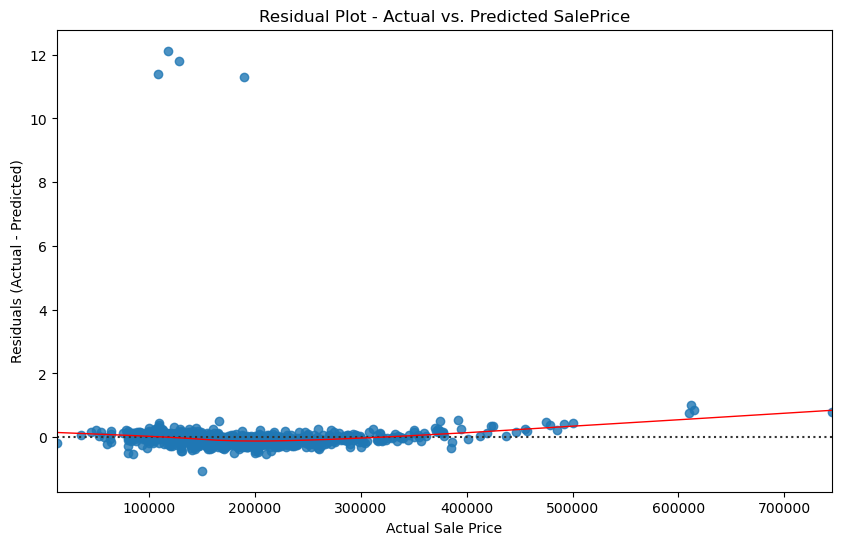

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the residuals
residuals = y_test - y_test_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title("Residual Plot - Actual vs. Predicted SalePrice")
plt.xlabel("Actual Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")

# Show the plot
plt.show()


In [356]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    """Calculate the VIF for each feature in X."""
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

def drop_high_vif_features(X, threshold=5):
    """Drop features with VIF > threshold."""
    while True:
        vif_data = calculate_vif(X)
        max_vif = vif_data["VIF"].max()
        
        # If the highest VIF is below the threshold, break
        if max_vif <= threshold:
            break
        
        # Get the feature with the highest VIF
        feature_to_drop = vif_data.loc[vif_data["VIF"] == max_vif, "feature"].values[0]
        print(f"Dropping feature '{feature_to_drop}' with VIF: {max_vif}")
        
        # Drop the feature with the highest VIF
        X = X.drop(columns=[feature_to_drop])
    
    return X

/var/folders/1m/1xttz4dj6yn7nywb9_fhdbs40000gn/T/ipykernel_39549/2506706600.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["HouseAge"] = 2024 - df_filtered["Year Built"]
/var/folders/1m/1xttz4dj6yn7nywb9_fhdbs40000gn/T/ipykernel_39549/2506706600.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Lot Area"] = df_filtered["Lot Area"].apply(lambda x: max(x, 1e-6))
/var/folders/1m/1xttz4dj6yn7nywb9_fhdbs40000gn/T/ipykernel_39549/2506706600.py:20: SettingWithCopyWarning: 
A value

Dropping feature 'Condition 2_Norm' with VIF: 438.7066717276166
Dropping feature 'MS Zoning_RL' with VIF: 103.3552230109248
Dropping feature 'Condition 1_Norm' with VIF: 24.04455254640032
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     248.2
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:25:17   Log-Likelihood:                -23252.
No. Observations:                2009   AIC:                         4.661e+04
Df Residuals:                    1958   BIC:                         4.689e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                      

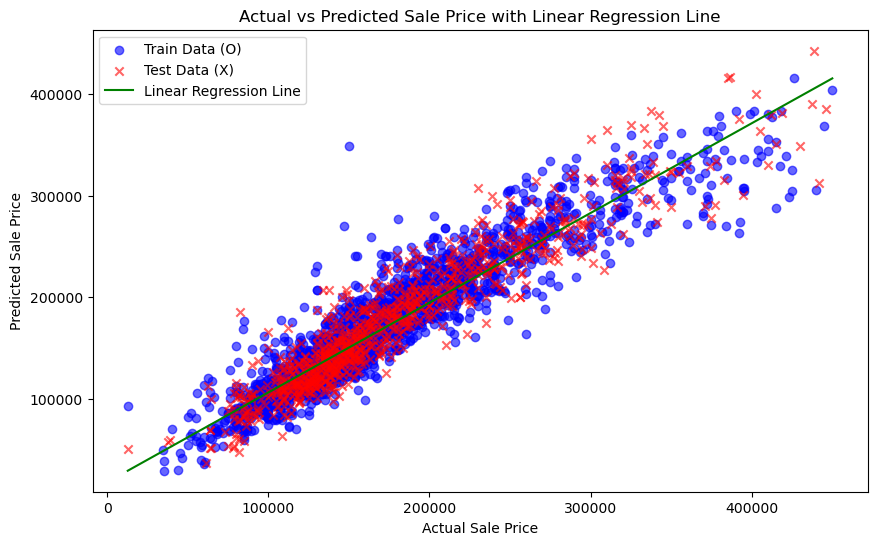

R² on Test Data: 0.889
RMSE on Test Data: 24003.672


In [363]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is the DataFrame containing the data

# Step 1: Remove the top 1% of SalePrice values
percentile_99 = np.percentile(df['SalePrice'], 99)
df_filtered = df[df['SalePrice'] <= percentile_99]

# Step 2: Create 'HouseAge' column
df_filtered["HouseAge"] = 2024 - df_filtered["Year Built"]

df_filtered["Lot Area"] = df_filtered["Lot Area"].apply(lambda x: max(x, 1e-6))
df_filtered["LotArea_sqrt"] = np.sqrt(df_filtered["Lot Area"])

# Features to scale
features_to_scale = ["Lot Area", "Gr Liv Area", "Year Remod/Add", "OverallQual_Squared", "HouseAge", "Cond_Qual_Interaction"]

# Scale the selected features
scaler = StandardScaler()
df_filtered[features_to_scale] = scaler.fit_transform(df_filtered[features_to_scale])

# Step 3: Prepare the feature matrix X and target vector y
X_filtered = df_filtered[["Gr Liv Area", "Year Remod/Add", "OverallQual_Squared", "HouseAge", "Condition 1", "Condition 2", "Cond_Qual_Interaction","Land Slope", "MS Zoning", "Neighborhood", "LotArea_sqrt"]] 

# One-hot encode 'Condition1' and 'Condition2' columns
X_filtered = pd.get_dummies(X_filtered, columns=["Condition 1", "Condition 2", "Land Slope", "MS Zoning", "Neighborhood"], drop_first=True)

X_filtered = X_filtered.astype(float)

X_filtered = drop_high_vif_features(X_filtered, threshold=10)
# Target variable y
y_filtered = df_filtered["SalePrice"]

# Step 4: Split the filtered dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Add a constant (intercept) term to the feature matrix for statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Step 5: Fit the model using statsmodels (OLS)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Step 6: Print the summary to get the F-statistic and p-values
print(model_sm.summary())

# Step 7: Make predictions on both training and test data
y_train_pred = model_sm.predict(X_train_sm)
y_test_pred = model_sm.predict(X_test_sm)

# Plotting the predictions
plt.figure(figsize=(10, 6))

# Plot the training data predictions (blue 'O' markers)
plt.scatter(y_train, y_train_pred, color='blue', label='Train Data (O)', alpha=0.6, marker='o')

# Plot the test data predictions (red 'X' markers)
plt.scatter(y_test, y_test_pred, color='red', label='Test Data (X)', alpha=0.6, marker='x')

# Plot the linear regression line (fit a line for the plot)
plt.plot([min(y_filtered), max(y_filtered)], [min(y_train_pred), max(y_train_pred)], color='green', label='Linear Regression Line')

# Labels and Title
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price with Linear Regression Line")

# Add a legend to distinguish between train, test, and the regression line
plt.legend()

# Show plot
plt.show()

# Step 8: Evaluate model performance using R² and RMSE
mse = mean_squared_error(y_test, y_test_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_test_pred)

print(f"R² on Test Data: {r2:.3f}")
print(f"RMSE on Test Data: {rmse:.3f}")


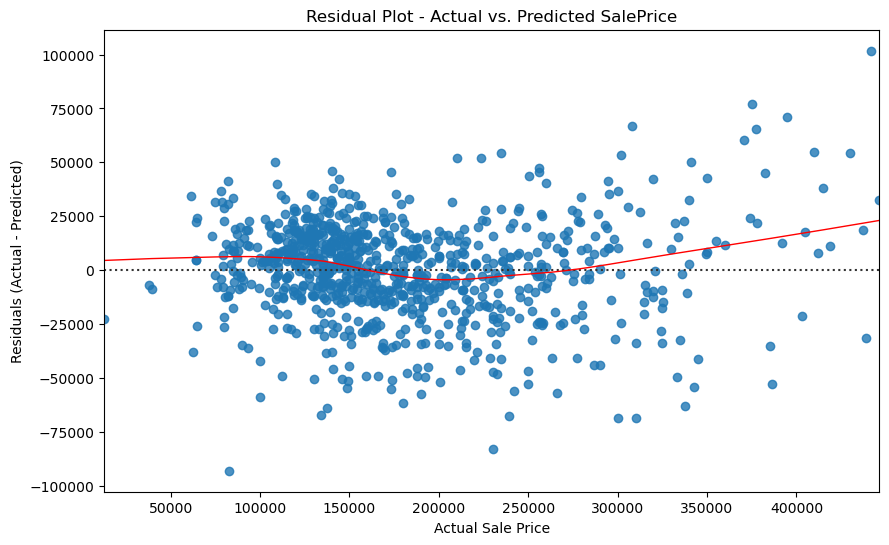

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the residuals
residuals = y_test - y_test_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title("Residual Plot - Actual vs. Predicted SalePrice")
plt.xlabel("Actual Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")

# Show the plot
plt.show()

In [354]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Cond_Qual_Interaction,OverallQual_Squared,HouseAge
0,1,526301100,20,RL,141.0,5.567726,Pave,None,IR1,Lvl,...,NaN,0,5,2010,WD,Normal,215000,-0.409589,-0.321277,0.375951
1,2,526350040,20,RH,80.0,0.504640,Pave,None,Reg,Lvl,...,NaN,0,6,2010,WD,Normal,105000,-0.409589,-0.718899,0.342928
2,3,526351010,20,RL,81.0,1.169315,Pave,None,IR1,Lvl,...,Gar2,12500,6,2010,WD,Normal,172000,0.246296,-0.321277,0.441997
3,4,526353030,20,RL,93.0,0.388542,Pave,None,Reg,Lvl,...,NaN,0,4,2010,WD,Normal,244000,0.136982,0.333525,0.111766
4,5,527105010,60,RL,74.0,1.059499,Pave,None,IR1,Lvl,...,NaN,0,3,2010,WD,Normal,189900,-0.956160,-0.718899,-0.845903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,-0.421380,Pave,None,IR1,Lvl,...,NaN,0,3,2006,WD,Normal,142500,0.246296,-0.321277,-0.416603
2926,2927,923276100,20,RL,NaN,-0.183153,Pave,None,IR1,Low,...,NaN,0,6,2006,WD,Normal,131000,-0.956160,-0.718899,-0.383580
2927,2928,923400125,85,RL,62.0,0.207861,Pave,None,Reg,Lvl,...,Shed,700,7,2006,WD,Normal,132000,-0.956160,-0.718899,-0.680788
2928,2929,924100070,20,RL,77.0,0.099553,Pave,None,Reg,Lvl,...,NaN,0,4,2006,WD,Normal,170000,-0.956160,-0.718899,-0.086372


In [355]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIF calculation
X_vif = X_train.copy()
X_vif = sm.add_constant(X_vif)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                  Feature          VIF
0                   const  1710.956552
1             Gr Liv Area     1.831223
2          Year Remod/Add     2.417584
3     OverallQual_Squared     4.129209
4                HouseAge     5.889112
5   Cond_Qual_Interaction     2.278518
6            LotArea_sqrt     1.436305
7       Condition 1_Feedr     2.731563
8        Condition 1_Norm     4.013870
9        Condition 1_PosA     1.283648
10       Condition 1_PosN     1.396208
11       Condition 1_RRAe     1.472727
12       Condition 1_RRAn     1.717333
13       Condition 1_RRNe     1.066567
14       Condition 1_RRNn     1.122632
15      Condition 2_Feedr     2.837688
16       Condition 2_Norm     3.646968
17       Condition 2_PosA          NaN
18       Condition 2_PosN          NaN
19       Condition 2_RRAe     1.285234
20       Condition 2_RRAn          NaN
21       Condition 2_RRNn     1.539018
22         Land Slope_Mod     1.087883
23         Land Slope_Sev     1.085942
24      MS Zoning_C (all)